#### The data used for the project is freely accessible public data from Kaggle generated by responders to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. This Kaggle data set FitBit Fitness Tracker Data contains personal fitness tracker from thirty Fitbit users who signed the consent to share the personal tracker data, including daily activity, steps, and heart rate. The data is stored in 18 csv files and organized in wide format.

In [60]:
import pandas as pd
import numpy as np

### 1. Loading Data

In [69]:
daily_activity_data = pd.read_csv("dailyActivity_merged.csv")
daily_calories_data = pd.read_csv("dailyCalories_merged.csv")
daily_steps_data = pd.read_csv("dailySteps_merged.csv")
sleep_day_data = pd.read_csv("sleepDay_merged.csv")
weight_log_data = pd.read_csv("weightLogInfo_merged.csv")

#### 2. Data Examination skipped (you can explore that to further understand the content of the datasets)

### 3. Data Cleaning : Checking for missing values

In [70]:
# Data Cleaning Process

# Checking for missing values in each dataset
missing_values = {
    "daily_activity_data": daily_activity_data.isnull().sum(),
    "daily_calories_data": daily_calories_data.isnull().sum(),
    "daily_steps_data": daily_steps_data.isnull().sum(),
    "sleep_day_data": sleep_day_data.isnull().sum(),
    "weight_log_data": weight_log_data.isnull().sum()
}

missing_values_df = pd.DataFrame(missing_values)
missing_values_df


,daily_activity_data,daily_calories_data,daily_steps_data,sleep_day_data,weight_log_data
ActivityDate,0.0,NaN,NaN,NaN,NaN
ActivityDay,NaN,0.0,0.0,NaN,NaN
BMI,NaN,NaN,NaN,NaN,0.0
Calories,0.0,0.0,NaN,NaN,NaN
Date,NaN,NaN,NaN,NaN,0.0
FairlyActiveMinutes,0.0,NaN,NaN,NaN,NaN
Fat,NaN,NaN,NaN,NaN,65.0
Id,0.0,0.0,0.0,0.0,0.0
IsManualReport,NaN,NaN,NaN,NaN,0.0
LightActiveDistance,0.0,NaN,NaN,NaN,NaN


#### Interpretation
- Daily Activity Data: No missing values in the relevant columns.
- Daily Calories Data: No missing values.
- Daily Steps Data: No missing values.
- Sleep Day Data: No missing values in the relevant columns.
- Weight Log Data: Some missing values in the 'Fat' column. 

For the 'fat' column in the Weight Log Data, we have a few options:

We can leave the missing values as is if this column is not critical for our analysis.
If we decide to use this column, we could impute the missing values using a statistical method (like the mean or median), but this would introduce some bias.

### 3. Data Cleaning : Checking for duplicate values

In [71]:
# Checking for duplicate records in each dataset
duplicate_counts = {
    "daily_activity_data": daily_activity_data.duplicated().sum(),
    "daily_calories_data": daily_calories_data.duplicated().sum(),
    "daily_steps_data": daily_steps_data.duplicated().sum(),
    "sleep_day_data": sleep_day_data.duplicated().sum(),
    "weight_log_data": weight_log_data.duplicated().sum()
}

duplicate_counts_df = pd.DataFrame(duplicate_counts, index=["Duplicates"])
duplicate_counts_df

,daily_activity_data,daily_calories_data,daily_steps_data,sleep_day_data,weight_log_data
Duplicates,0,0,0,3,0


In [75]:
# Removing duplicate records from the Sleep Day Data
sleep_day_data_cleaned = sleep_day_data.copy().drop_duplicates()

### 4. Data Integration and transformation

In [87]:
# Standardizing the date columns for merging
daily_activity_data['ActivityDate'] = pd.to_datetime(daily_activity_data.loc[:,'ActivityDate'])
daily_calories_data['ActivityDay'] = pd.to_datetime(daily_calories_data.loc[:,'ActivityDay'])
daily_steps_data['ActivityDay'] = pd.to_datetime(daily_steps_data.loc[:,'ActivityDay'])
sleep_day_data_cleaned['SleepDay'] = pd.to_datetime(sleep_day_data_cleaned.loc[:,'SleepDay'])

sleep_day_data_cleaned['SleepDay']

0     2016-04-12
1     2016-04-13
2     2016-04-15
3     2016-04-16
4     2016-04-17
         ...    
408   2016-04-30
409   2016-05-01
410   2016-05-02
411   2016-05-03
412   2016-05-04
Name: SleepDay, Length: 410, dtype: datetime64[ns]

In [86]:
# Merging the Daily Activity, Daily Calories, and Daily Steps datasets

merged_data = pd.merge(daily_activity_data, daily_calories_data, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'])
merged_data = pd.merge(merged_data, daily_steps_data, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'])

# Dropping duplicated columns

merged_data.drop(columns=['ActivityDay_x', 'ActivityDay_y','Calories_y'], inplace=True)
merged_data = merged_data.rename(columns={'Calories_x':'Calories'})

merged_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,13162
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,10735
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,10460
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,9762
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,12669


In [140]:
# Merging the Sleep Day Data with the previous merged dataset
final_merged_data = pd.merge(merged_data, sleep_day_data_cleaned, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

# Displaying the first few rows of the final merged dataset
final_merged_data.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,13162,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,10735,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,10460,NaT,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,9762,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,12669,2016-04-16,2.0,340.0,367.0


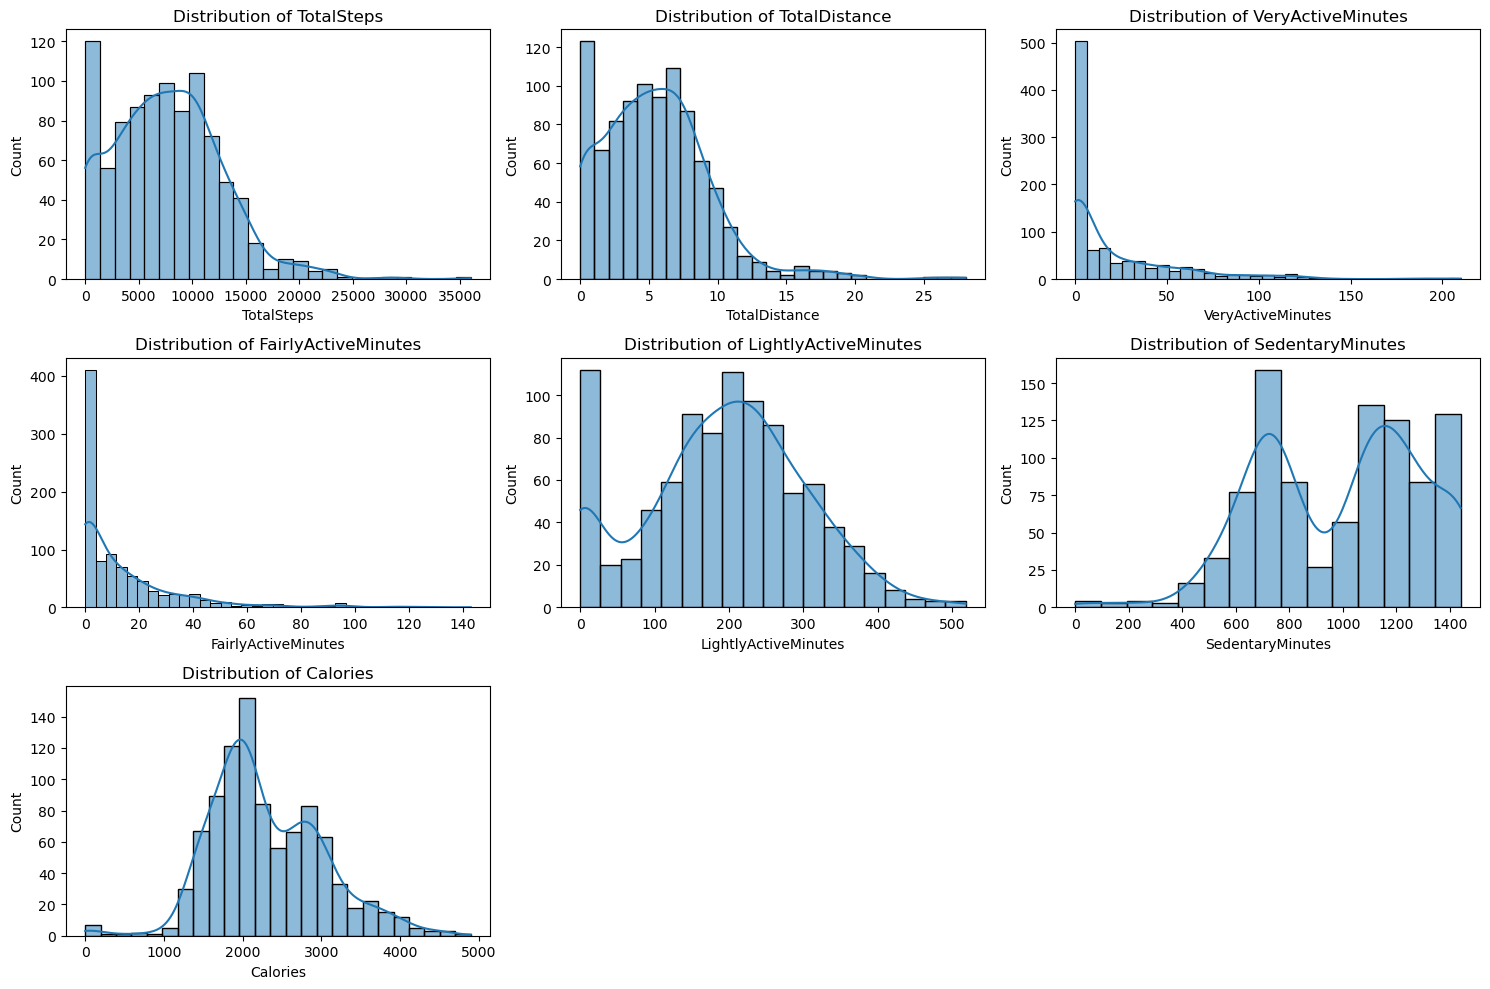

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for the activity data
activity_summary = final_merged_data[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 
                                      'FairlyActiveMinutes', 'LightlyActiveMinutes', 
                                      'SedentaryMinutes', 'Calories']].describe()

# Visualizing distributions of key activity metrics
plt.figure(figsize=(15, 10))

# List of columns for distribution plots
columns_to_plot = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 
                   'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(final_merged_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

activity_summary

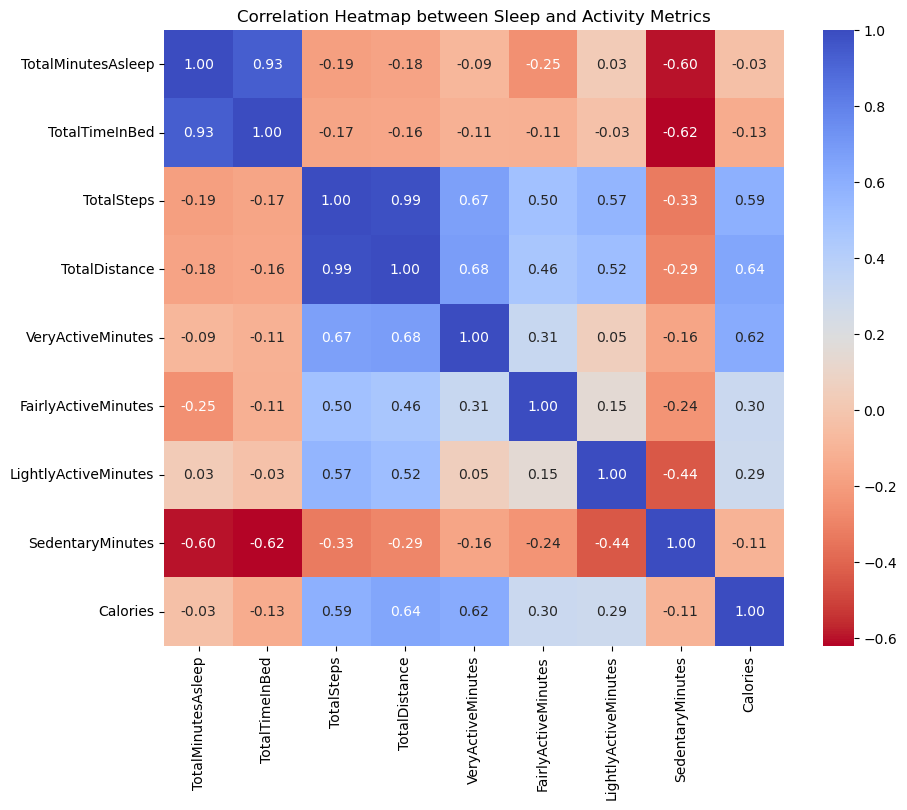

In [101]:
# Calculating correlation coefficients between sleep and activity metrics
correlation_data = final_merged_data[['TotalMinutesAsleep', 'TotalTimeInBed', 'TotalSteps', 
                                      'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 
                                      'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].corr()

# Creating a heatmap for visual representation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title('Correlation Heatmap between Sleep and Activity Metrics')
plt.show()


In [142]:
final_merged_data['DayOfWeek'] = final_merged_data['ActivityDate'].dt.day_name()


In [143]:
final_merged_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,13162,2016-04-12,1.0,327.0,346.0,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,10735,2016-04-13,2.0,384.0,407.0,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,11,181,1218,1776,10460,NaT,NaN,NaN,NaN,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,9762,2016-04-15,1.0,412.0,442.0,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,12669,2016-04-16,2.0,340.0,367.0,Saturday


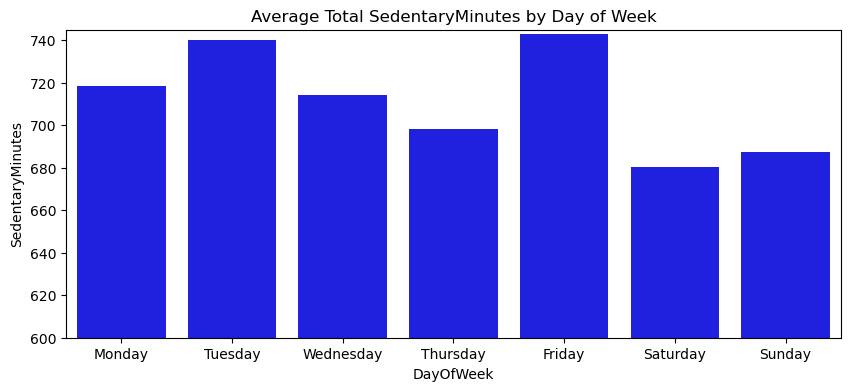

In [206]:
cleaned_data = final_merged_data.dropna()
weekly_insights = cleaned_data.groupby('DayOfWeek').mean()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_insights = weekly_insights.reindex(ordered_days)

plt.figure(figsize=(10, 4))
sns.barplot(x=weekly_insights.index, y='SedentaryMinutes', data=weekly_insights,color='b')
plt.ylim(600,745)
plt.title('Average Total SedentaryMinutes by Day of Week')
plt.show()


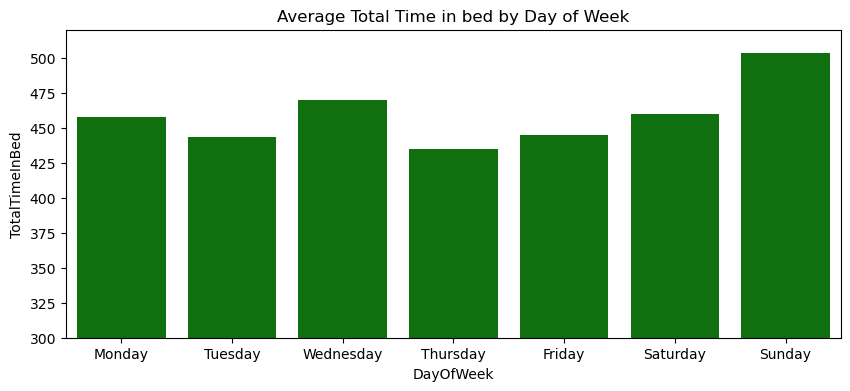

In [214]:
plt.figure(figsize=(10, 4))
sns.barplot(x=weekly_insights.index, y='TotalTimeInBed', data=weekly_insights,color='g')
plt.ylim(300,520)
plt.title('Average Total Time in bed by Day of Week')
plt.show()


In [207]:
weekly_insights

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
DayOfWeek,,,,,,,,,,,,,,,,,,
Monday,4.985778e+09,9273.217391,6.540870,6.535870,0.311339,1.734348,0.784348,4.013913,0.002174,30.717391,19.086957,222.369565,718.413043,2431.978261,9273.217391,1.108696,419.500000,457.347826
Tuesday,4.911466e+09,9182.692308,6.430000,6.430000,0.138651,1.718462,0.816615,3.886615,0.001385,30.615385,20.046154,216.584615,740.046154,2496.200000,9182.692308,1.107692,404.538462,443.292308
Wednesday,5.264718e+09,8022.863636,5.719849,5.719849,0.095098,1.357879,0.704091,3.652121,0.000000,21.333333,16.742424,207.969697,714.454545,2378.242424,8022.863636,1.151515,434.681818,470.030303
Thursday,5.033208e+09,8183.515625,5.773438,5.744844,0.169390,1.250937,0.661094,3.695938,0.002812,22.859375,15.859375,202.937500,698.375000,2306.671875,8183.515625,1.031250,401.296875,434.875000
Friday,4.922502e+09,7901.403509,5.511930,5.511930,0.073409,1.134035,0.588070,3.779474,0.000175,21.157895,14.578947,222.684211,743.087719,2329.649123,7901.403509,1.070175,405.421053,445.052632
Saturday,4.960006e+09,9871.122807,7.015789,7.015789,0.000000,1.784035,0.963158,4.266140,0.000000,27.561404,22.719298,246.771930,680.438596,2506.894737,9871.122807,1.192982,419.070175,459.842105
Sunday,4.844438e+09,7297.854545,5.184727,5.184727,0.000000,1.190182,0.702545,3.289273,0.000000,22.145455,16.763636,200.036364,687.636364,2276.600000,7297.854545,1.181818,452.745455,503.509091
